In [627]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from IPython.core.display import HTML
import seaborn as sns
import re
%matplotlib inline

css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [628]:
titles = pd.DataFrame.from_csv('movie_metadata.csv', index_col=None)

In [629]:
titles=titles.set_index('movie_title')

In [630]:
titles['ratio']=titles.gross/titles.budget

In [631]:
titles=titles=titles.dropna(axis=0, subset=['imdb_score','gross', 'budget', 'ratio', 'director_facebook_likes' , 'content_rating' , 'title_year' , 'movie_facebook_likes' ])

In [632]:
titles.content_rating.value_counts()

R            1737
PG-13        1331
PG            576
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [633]:
((titles.imdb_score//1)).value_counts()

6.0    1459
7.0    1091
5.0     769
4.0     217
8.0     211
3.0      64
2.0      22
9.0       4
1.0       3
Name: imdb_score, dtype: int64

In [634]:
titles.genres=titles.genres.str.replace("\|.*","")


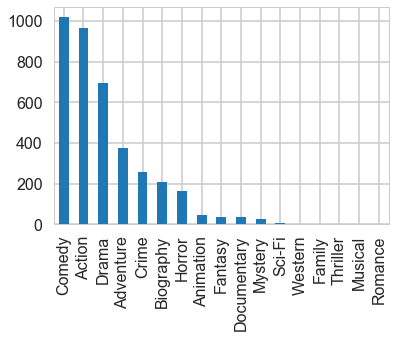

In [635]:
titles.genres.value_counts().plot(kind = 'bar')

In [636]:
def normalize(array1, name):
    print ("normalizing "+name);
    array=array1
    array=array/array.std()
    array=array-array.mean()
    return(array);

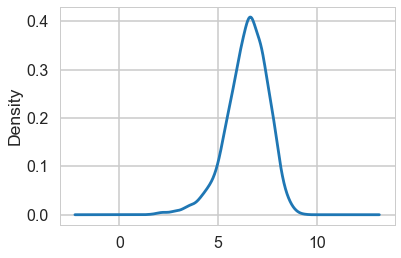

In [637]:
titles.imdb_score.plot.kde()

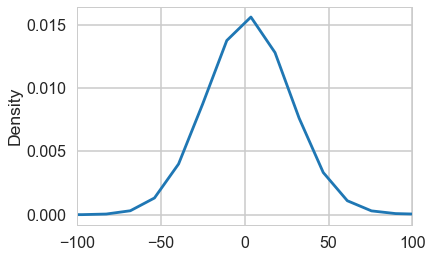

In [638]:
titles.ratio.plot.kde(xlim=[-100,100])

In [639]:
## removing movies with a very high profit ratio for which are mostly low budget movies
titles=titles.drop(titles[(titles.ratio>2000)].index)

In [640]:
titles.ratio.mean()


3.1335171057909883

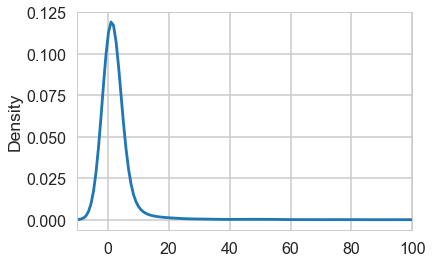

In [641]:
titles.ratio.plot.kde(xlim=[-10,100])

In [642]:
print(titles.ratio.mean(),titles.ratio.std() )


3.1335171057909883 14.902585199854006


In [643]:
len(titles[(titles.ratio > 18)])

80

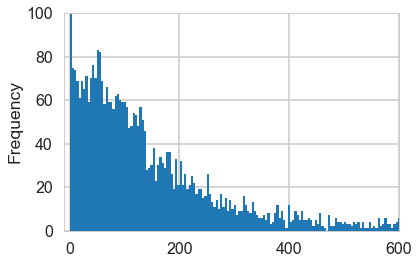

In [644]:
# %profit distribution
(titles.ratio*100).plot.hist(xlim=[-10,600],ylim=[0,100],bins=10000)

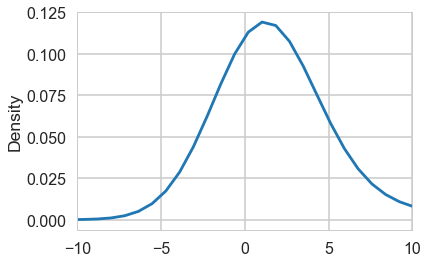

In [645]:
# profit density plot
(titles.ratio).plot.kde(xlim=[-10,10])

In [646]:
titles.ratio.mean() , titles.ratio.std() , titles.ratio.median() 

(3.1335171057909883, 14.902585199854006, 1.0924944666666667)

In [647]:
len(titles[(titles.ratio > 10)])

153

In [648]:
## defining profit making movie. Criterion is 20% profit.
titles['profit_making']= (titles.ratio > 1.2)

In [649]:
titles.profit_making.value_counts()

False    2059
True     1778
Name: profit_making, dtype: int64

In [650]:
##  sending budget and likes through normalizer


In [651]:
for column in ['budget','movie_facebook_likes','cast_total_facebook_likes','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','duration','num_voted_users', 'num_user_for_reviews', 'gross']:
    if np.issubdtype(titles[column].dtype, np.number):
        print (column + ": true")
        titles[column]=normalize(array1=titles[column],name=column)
    else:
        print (column + ":false")

budget: true
normalizing budget
movie_facebook_likes: true
normalizing movie_facebook_likes
cast_total_facebook_likes: true
normalizing cast_total_facebook_likes
director_facebook_likes: true
normalizing director_facebook_likes
actor_1_facebook_likes: true
normalizing actor_1_facebook_likes
actor_2_facebook_likes: true
normalizing actor_2_facebook_likes
duration: true
normalizing duration
num_voted_users: true
normalizing num_voted_users
num_user_for_reviews: true
normalizing num_user_for_reviews
gross: true
normalizing gross


In [652]:
titles.budget.median()

-0.09168398031167933

In [653]:
titles2 = pd.DataFrame.from_csv('movie_metadata.csv', index_col=None)

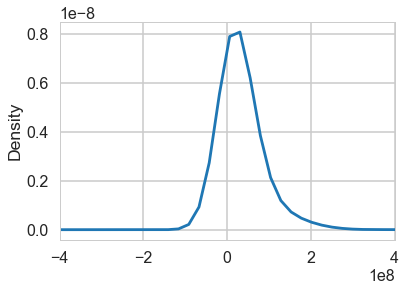

In [654]:
titles2.budget.plot.kde(xlim=[-.4e9,.4e9])

In [655]:
titles2.budget.mean()

39752620.436387606

In [656]:
titles2.budget.std()


206114898.44868386

In [657]:
temp1=((titles2.budget//1e6)*(1e6)).value_counts().sort_index()

In [658]:
temp1=((titles.ratio//.5)*.5).value_counts().sort_index()

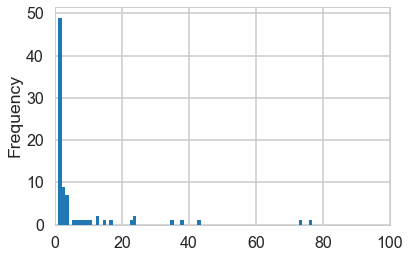

In [659]:
temp1.plot.hist(bins=1000 , xlim=[0,100]  )

In [660]:
temp1=((titles2.budget//1000000)*(1000000)).value_counts().sort_index()


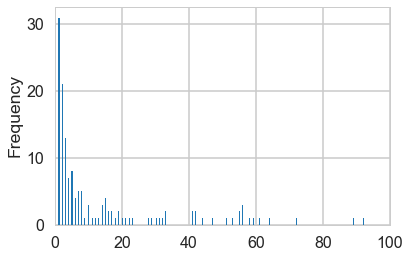

In [661]:
temp1.plot.hist(bins=1000 , xlim=[0,100]  )

In [662]:
titles2.budget.mean()

39752620.436387606

In [663]:
titles[titles.country.str.match("South Korea")].budget

movie_title
Snowpiercer                            -0.028209
Dragon Wars: D-War                     -0.046983
The Last Godfather                     -0.143537
Tae Guk Gi: The Brotherhood of War     -0.146219
The Host                               54.400735
The Good, the Bad, the Weird           -0.158735
Lady Vengeance                         18.570869
Oldboy                                 -0.190026
Name: budget, dtype: float64

In [664]:
titles_highb = titles[(titles.budget > -.114)]

In [665]:
titles_lowb = titles[(titles.budget <= -.114)]

In [666]:
len(titles_highb)

2052

In [667]:
len(titles_lowb)

1785

In [668]:
titles_highb.profit_making.mean()

0.40692007797270957

In [669]:
titles_highb.sort_values('budget', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ratio,profit_making
movie_title,,,,,,,,,,,,,,,,,,,,,
The Host,Color,Joon-ho Bong,363.0,-0.000762,-0.068297,74.0,Kang-ho Song,-0.455541,-0.706838,Comedy,...,South Korea,R,54.400735,2006.0,-0.353520,7.0,1.85,-0.105261,0.000180,False
Lady Vengeance,Color,Chan-wook Park,202.0,0.087825,-0.260555,38.0,Yeong-ae Lee,-0.449838,-0.735253,Crime,...,South Korea,R,18.570869,2005.0,-0.413853,7.7,2.35,-0.245279,0.000050,False
Fateless,Color,Lajos Koltai,73.0,1.062278,-0.245740,0.0,Péter Fancsikai,-0.495717,-0.735478,Drama,...,Hungary,R,10.971746,2005.0,-0.441358,7.1,2.35,-0.403640,0.000078,False
Princess Mononoke,Color,Hayao Miyazaki,174.0,1.062278,1.714699,745.0,Jada Pinkett Smith,-0.438433,-0.705456,Adventure,...,Japan,PG-13,10.524738,1997.0,-0.253038,8.4,1.85,0.081431,0.000958,False
Steamboy,Color,Katsuhiro Ôtomo,105.0,-0.310815,-0.234876,101.0,Robin Atkin Downes,-0.464678,-0.732415,Action,...,Japan,PG-13,9.306732,2004.0,-0.367272,6.9,1.85,-0.386558,0.000193,False
Akira,Color,Katsuhiro Ôtomo,150.0,0.619345,-0.234876,4.0,Takeshi Kusao,-0.495912,-0.732004,Action,...,Japan,R,4.713644,1988.0,-0.440692,8.1,1.85,-0.431971,0.000399,False
Godzilla 2000,Color,Takao Okawara,107.0,-0.487988,-0.259896,3.0,Naomi Nishida,-0.493514,-0.594934,Action,...,Japan,PG,4.266637,1999.0,-0.441136,6.0,2.35,-0.416149,0.010037,False
Kabhi Alvida Naa Kehna,Color,Karan Johar,20.0,3.675584,-0.207881,860.0,John Abraham,0.022107,-0.691500,Drama,...,India,R,2.925615,2006.0,-0.219988,6.0,2.35,-0.401213,0.004679,False
Tango,Color,Carlos Saura,35.0,0.220705,-0.228292,4.0,Juan Luis Galiardo,-0.474203,-0.714179,Drama,...,Spain,PG-13,2.925615,1998.0,-0.436034,7.2,2.00,-0.406814,0.002410,False


In [670]:
titles_lowb.profit_making.mean()

0.52829131652661065

In [671]:
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle


In [672]:
titles_highb=shuffle(titles_highb)

In [673]:
titles_highb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ratio,profit_making
movie_title,,,,,,,,,,,,,,,,,,,,,
Night at the Museum,Color,Shawn Levy,179.0,-0.089349,-0.198334,1000.0,Rami Malek,2.678947,2.844237,Action,...,USA,PG,0.288272,2006.0,0.223638,6.4,1.85,-0.291952,2.280575,True
Abandon,Color,Stephen Gaghan,72.0,-0.487988,-0.234547,956.0,Zooey Deschanel,0.540515,-0.585195,Drama,...,USA,PG-13,-0.091684,2002.0,1.998143,4.9,2.35,-0.419789,0.428775,False
Hudson Hawk,Color,Michael Lehmann,60.0,-0.443695,-0.248703,554.0,James Coburn,0.346112,-0.492389,Action,...,USA,R,0.109469,1991.0,-0.270340,5.7,1.85,-0.431971,0.245973,False
True Grit,Color,Ethan Coen,493.0,-0.000762,0.068654,538.0,Jeff Bridges,0.346112,1.704178,Adventure,...,USA,PG-13,-0.033573,2010.0,2.219956,7.7,2.35,1.248252,4.500825,True
Jurassic Park,Color,Steven Spielberg,308.0,0.752225,4.348370,191.0,Ariana Richards,-0.433638,4.356863,Adventure,...,USA,PG-13,0.078179,1993.0,-0.306495,8.1,1.85,0.454814,5.663238,True


In [674]:
titles_highb=titles_highb[['imdb_score','gross', 'budget', 'ratio', 'director_facebook_likes' , 'content_rating' , 'title_year' , 'movie_facebook_likes' ,'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]

In [675]:
titles_highb=titles_highb.dropna(axis=0, subset = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'])

In [676]:
titles_highb_train=titles_highb[:1500]
titles_highb_test=titles_highb[1500:]

In [677]:
linear_regression_highb= LinearRegression()

In [678]:
linear_regression_highb.fit(titles_highb_train[['title_year','budget','imdb_score','director_facebook_likes' ,  'actor_1_facebook_likes', 'actor_2_facebook_likes' , 'actor_3_facebook_likes']] , titles_highb_train.ratio)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [679]:
linear_regression_highb.predict(titles_highb_test[['title_year','budget','imdb_score','director_facebook_likes' ,  'actor_1_facebook_likes', 'actor_2_facebook_likes' , 'actor_3_facebook_likes']])[:10]

array([ 1.82440289,  0.79175729,  0.88586517,  1.29776949,  1.53415569,
        1.34036901,  0.90069075,  1.45307588,  0.7506961 ,  1.2331124 ])

In [680]:
titles_highb_test.ratio[:10]

movie_title
Silverado                        1.276923
Son of God                       2.713463
Teenage Mutant Ninja Turtles     1.526970
The Four Feathers                0.523033
Coach Carter                     2.241770
Bad Boys II                      1.064589
Get Carter                       0.374180
Everybody's Fine                 0.421697
Stealth                          0.234848
Homefront                        0.899263
Name: ratio, dtype: float64

In [681]:
linear_regression_highb.score(titles_highb_test[['title_year','budget','imdb_score','director_facebook_likes' ,  'actor_1_facebook_likes', 'actor_2_facebook_likes' , 'actor_3_facebook_likes' ]],titles_highb_test.ratio)

0.085595856397699288

In [682]:
linear_regression_highb.coef_

array([ -1.73241211e-02,  -5.43038952e-02,   3.30446558e-01,
         4.83230120e-03,   2.69215389e-02,   2.14408128e-02,
         4.05728013e-05])

In [683]:
new=titles.genres.drop_duplicates()

In [684]:
new.sort_values

<bound method Series.sort_values of movie_title
Avatar                           Action
Tangled                       Adventure
Titanic                           Drama
A Christmas Carol             Animation
Evan Almighty                    Comedy
Angels & Demons                 Mystery
Ocean's Twelve                    Crime
The Aviator                   Biography
The Haunting                    Fantasy
Oceans                      Documentary
The Invasion                     Sci-Fi
Exorcist: The Beginning          Horror
The Adjustment Bureau           Romance
The Nutcracker                   Family
Pale Rider                      Western
Grease                          Musical
Locker 13                      Thriller
Name: genres, dtype: object>

In [685]:
titles_cat=titles

In [686]:
from pandas import get_dummies 

In [687]:
type (titles_cat)

pandas.core.frame.DataFrame

In [688]:
titles_cat=pd.get_dummies(titles_cat , columns=["genres"])

In [689]:
titles_cat.genres_Action.head()

movie_title
Avatar                                       1
Pirates of the Caribbean: At World's End     1
Spectre                                      1
The Dark Knight Rises                        1
John Carter                                  1
Name: genres_Action, dtype: uint8

In [690]:
titles_cat.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'ratio', 'profit_making', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Biography',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_Horror', 'genres_Musical',
       'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi', 'genres_Thriller',
       'genres_Western'],
      dtype='object')

In [691]:
titles_cat.content_rating.value_counts()

R            1735
PG-13        1331
PG            576
G              91
Not Rated      42
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [692]:
titles_cat.sort_values('budget', ascending=False).country

movie_title
The Host                                        South Korea
Lady Vengeance                                  South Korea
Fateless                                            Hungary
Princess Mononoke                                     Japan
Steamboy                                              Japan
Akira                                                 Japan
Godzilla 2000                                         Japan
Kabhi Alvida Naa Kehna                                India
Tango                                                 Spain
Red Cliff                                             China
The Legend of Suriyothai                           Thailand
The Messenger: The Story of Joan of Arc              France
Ong-bak 2                                          Thailand
Pirates of the Caribbean: At World's End                USA
John Carter                                             USA
Tangled                                                 USA
Spider-Man 3                

In [693]:
titles_cat=titles_cat.drop(titles_cat[titles_cat.content_rating.str.match("NC-17|Passed|M|GP")].index)

In [694]:
titles_cat.content_rating.value_counts()

R            1735
PG-13        1331
PG            576
G              91
Not Rated      42
Unrated        23
Approved       17
X              10
Name: content_rating, dtype: int64

In [695]:
titles_cat=pd.get_dummies(titles_cat , columns=["content_rating"])

In [696]:
titles_cat_highb = titles_cat[(titles_cat.budget > -.114)]

In [697]:
titles_cat_lowb = titles_cat[(titles_cat.budget <= -.114)]

In [698]:
len(titles_cat_highb)

2051

In [699]:
len(titles_cat_lowb)

1774

In [700]:
titles_cat_highb.profit_making.mean()

0.40711847879083374

In [701]:
titles_cat_lowb.profit_making.mean()

0.52705749718151074

In [702]:
titles_cat_highb=shuffle(titles_cat_highb)

In [703]:
titles_cat_highb.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'ratio',
       'profit_making', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Horror', 'genres_Musical', 'genres_Mystery', 'genres_Romance',
       'genres_Sci-Fi', 'genres_Thriller', 'genres_Western',
       'content_rating_Approved', 'content_rating_G',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rati

In [704]:
#titles_cat_highb.drop(titles_cat_highb.country==)

In [705]:
len(titles_cat_highb[titles_cat_highb.country != "USA"])

339

In [706]:
titles_cat_highb=titles_cat_highb.drop(titles_cat_highb[titles_cat_highb.country != "USA"].index)

In [707]:
#titles_cat_highb=titles_cat_highb.drop(['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'],axis=1)

In [708]:
titles_cat_highb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'ratio',
       'profit_making', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Horror', 'genres_Musical', 'genres_Mystery', 'genres_Romance',
       'genres_Sci-Fi', 'genres_Thriller', 'genres_Western',
       'content_rating_Approved', 'content_rating_G',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rati

In [709]:
titles_cat_ml_highb=titles_cat_highb.select_dtypes(exclude=['object']) 

In [710]:
titles_cat_ml_highb=titles_cat_ml_highb.select_dtypes(exclude=['bool']) 

In [711]:
titles_cat_ml_highb=titles_cat_ml_highb.dropna()

In [712]:
titles_cat_ml_highb=shuffle(titles_cat_ml_highb)

In [713]:
titles_cat_ml_highb.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'ratio', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Horror', 'genres_Musical', 'genres_Mystery', 'genres_Romance',
       'genres_Sci-Fi', 'genres_Thriller', 'genres_Western',
       'content_rating_Approved', 'content_rating_G',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [714]:
titles_cat_ml_highb_train=titles_cat_ml_highb[:1200]
titles_cat_ml_highb_test=titles_cat_ml_highb[1200:]

In [715]:
titles_cat_ml_highb_train_x=titles_cat_ml_highb_train.drop(['gross', 'ratio'],axis=1 )

In [716]:
titles_cat_ml_highb_test_x=titles_cat_ml_highb_test.drop( ['ratio' , 'gross' ],axis=1)

In [717]:
titles_cat_ml_highb_train_y=pd.DataFrame(titles_cat_ml_highb_train['ratio'])

In [718]:
titles_cat_ml_highb_test_y=pd.DataFrame(titles_cat_ml_highb_test[ 'ratio' ])

In [719]:
linear_regression_highb_cat= LinearRegression()

In [720]:
linear_regression_highb_cat.fit(titles_cat_ml_highb_train_x ,titles_cat_ml_highb_train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [721]:
linear_regression_highb_cat.predict(titles_cat_ml_highb_train_x)[:10]

array([[ 1.63006605],
       [ 0.3136847 ],
       [ 0.72667237],
       [ 1.85283783],
       [ 1.37825711],
       [ 1.65435159],
       [ 0.70591586],
       [ 2.35479854],
       [ 1.26327582],
       [ 0.70257092]])

In [722]:
titles_cat_ml_highb_train_y[:10]

,ratio
movie_title,
A Lot Like Love,0.727859
Robin Hood,0.526099
Dragonball: Evolution,0.207857
Jay and Silent Bob Strike Back,1.366336
Payback,1.630349
Spy Kids 2: Island of Lost Dreams,2.251852
Victor Frankenstein,0.144338
Horrible Bosses,3.357961
Furry Vengeance,0.502750


In [723]:
linear_regression_highb_cat.score(titles_cat_ml_highb_test_x,titles_cat_ml_highb_test_y)

0.31549178633129304

In [724]:
linear_regression_highb_cat.coef_

array([[  1.77653470e-03,  -3.82294304e-02,  -1.00219576e-01,
         -7.70199808e-05,  -9.23296366e-01,   4.55344000e-01,
          1.15859490e+00,   4.92516598e-03,  -7.29868699e-02,
         -2.09489062e+00,  -3.13826697e-02,  -2.63505198e-01,
          1.61208542e-01,  -1.31854596e-01,  -1.91088030e-02,
          2.32499271e-01,   2.31330053e-01,   2.31275369e-02,
          3.87936129e-01,   4.69756096e-01,   9.74766570e-03,
          6.49942093e-02,   9.28521092e-02,  -3.46944695e-16,
          3.30211505e-02,   3.17329724e-01,   2.22044605e-16,
          5.93358784e-02,  -5.03549535e-01,  -1.41838029e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.38600946e-01,   0.00000000e+00,   2.01615765e-01,
         -1.30785766e-01,  -4.09430945e-01,   0.00000000e+00,
          0.00000000e+00]])

In [725]:
titles_cat_ml_highb_test_x.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Horror', 'genres_Musical', 'genres_Mystery', 'genres_Romance',
       'genres_Sci-Fi', 'genres_Thriller', 'genres_Western',
       'content_rating_Approved', 'content_rating_G',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [726]:
titles2 = pd.DataFrame.from_csv('movie_metadata.csv', index_col=None)

In [727]:
titles2=titles2.set_index('movie_title')

In [728]:

titles2['ratio']=titles2.gross/titles2.budget

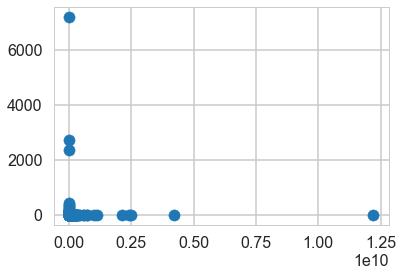

In [729]:
plt.ylim=[0,500]
plt.xlim=[0,.2e10]
plt.scatter(titles2.budget , titles2.ratio)

In [730]:
titles2=titles2.drop(titles2[titles2.country!="USA"].index)

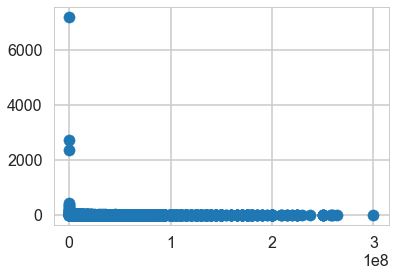

In [731]:
plt.ylim=[0,500]
plt.xlim=[0,.2e10]
plt.scatter(titles2.budget , titles2.ratio)

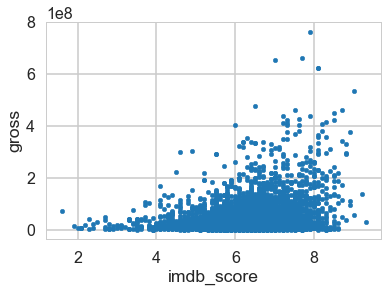

In [732]:
titles2.plot.scatter(x='imdb_score',y='gross')

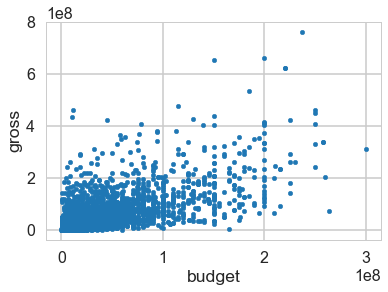

In [733]:
titles2.plot.scatter(x='budget',y='gross')

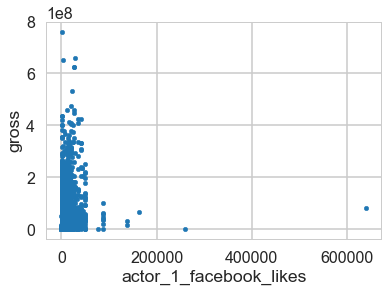

In [734]:
titles2.plot.scatter(x='actor_1_facebook_likes',y='gross')

In [736]:
titles2.actor_1_facebook_likes.std()

16655.361604538255

In [996]:
#Logistic Regression #####

In [997]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [998]:
logistic_regression_1= LogisticRegression()

In [999]:
titles_cat_ml_highb=titles_cat_highb.select_dtypes(exclude=['object']) 

In [1000]:
titles_cat_ml_highb_ratio=titles_cat_ml_highb.ratio

In [1001]:
titles_cat_logistic_highb=titles_cat_ml_highb.drop(['ratio'], axis=1)

In [1002]:
titles_cat_logistic_highb=titles_cat_logistic_highb.dropna()

In [1003]:
titles_cat_logistic_highb=shuffle(titles_cat_logistic_highb)

In [1004]:
titles_cat_logistic_highb_train=titles_cat_logistic_highb[:1200]
titles_cat_logistic_highb_test=titles_cat_logistic_highb[1200:]

In [1005]:
titles_cat_logistic_highb_train_x=titles_cat_logistic_highb_train.drop(['gross', 'profit_making','movie_facebook_likes','num_voted_users'],axis=1 )

In [1006]:
titles_cat_logistic_highb_test_x=titles_cat_logistic_highb_test.drop( ['gross', 'profit_making','movie_facebook_likes','num_voted_users' ],axis=1)

In [1007]:
titles_cat_logistic_highb_train_y=pd.DataFrame(titles_cat_logistic_highb_train['profit_making'])

In [1008]:
titles_cat_logistic_highb_test_y=pd.DataFrame(titles_cat_logistic_highb_test[ 'profit_making' ])

In [1009]:
logistic_regression_1.fit(titles_cat_logistic_highb_train_x,titles_cat_logistic_highb_train_y.profit_making)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1010]:
accuracy_score(logistic_regression_1.predict(titles_cat_logistic_highb_test_x),titles_cat_logistic_highb_test_y.profit_making)

0.68972332015810278

In [1011]:
titles_cat_logistic_highb_test_x.index[:10]

Index(['Marmaduke ', 'Mission: Impossible ', 'Aliens vs. Predator: Requiem ',
       'Hop ', 'Gulliver's Travels ', 'The Deep End of the Ocean ',
       'Harley Davidson and the Marlboro Man ',
       'Transformers: Revenge of the Fallen ', 'Unfaithful ',
       'This Is the End '],
      dtype='object', name='movie_title')

In [1012]:
logistic_regression_2=LogisticRegression()

In [1013]:
titles_cat_lowb=titles_cat_lowb.drop(titles_cat_lowb[titles_cat_lowb.country!="USA"].index)

In [1014]:
titles_cat_ml_lowb=titles_cat_lowb.select_dtypes(exclude=['object']) 

In [1015]:
titles_cat_ml_lowb_ratio=titles_cat_ml_lowb.ratio

In [1016]:
titles_cat_logistic_lowb=titles_cat_ml_lowb.drop(['ratio'], axis=1)

In [1017]:
titles_cat_logistic_lowb=titles_cat_logistic_lowb.dropna()

In [1018]:
titles_cat_logistic_lowb=shuffle(titles_cat_logistic_lowb)

In [1019]:
titles_cat_logistic_lowb_train=titles_cat_logistic_lowb[:1200]
titles_cat_logistic_lowb_test=titles_cat_logistic_lowb[1200:]

In [1020]:
titles_cat_logistic_lowb_train_x=titles_cat_logistic_lowb_train.drop(['gross', 'profit_making','movie_facebook_likes','num_voted_users'],axis=1 )

In [1021]:
titles_cat_logistic_lowb_test_x=titles_cat_logistic_lowb_test.drop( ['gross', 'profit_making','movie_facebook_likes','num_voted_users'],axis=1)

In [1022]:
titles_cat_logistic_lowb_train_y=pd.DataFrame(titles_cat_logistic_lowb_train['profit_making'])

In [1023]:
titles_cat_logistic_lowb_test_y=pd.DataFrame(titles_cat_logistic_lowb_test[ 'profit_making' ])

In [1024]:
logistic_regression_2.fit(titles_cat_logistic_lowb_train_x,titles_cat_logistic_lowb_train_y.profit_making)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1025]:
accuracy_score(logistic_regression_2.predict(titles_cat_logistic_lowb_test_x),titles_cat_logistic_lowb_test_y.profit_making)

0.71794871794871795

In [1026]:
accuracy_score(logistic_regression_2.predict(titles_cat_logistic_lowb_train_x),titles_cat_logistic_lowb_train_y.profit_making)

0.6958333333333333

In [1027]:
##SVM technique

In [1028]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [1029]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=.1))
])


In [1030]:
poly_kernel_svm_clf.fit(titles_cat_logistic_lowb_train_x,titles_cat_logistic_lowb_train_y.profit_making)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=10,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [1031]:
poly_kernel_svm_clf.score(titles_cat_logistic_lowb_test_x,titles_cat_logistic_lowb_test_y.profit_making)

0.73076923076923073

In [1032]:
poly_kernel_svm_clf.score(titles_cat_logistic_lowb_train_x,titles_cat_logistic_lowb_train_y.profit_making)

0.78500000000000003

In [1033]:
titles_cat_logistic_lowb_train_x_noimdb=titles_cat_logistic_lowb_train_x.drop('imdb_score',axis=1)

In [1034]:
titles_cat_logistic_lowb_test_x_noimdb=titles_cat_logistic_lowb_test_x.drop('imdb_score',axis=1)

In [1035]:
lgr = Pipeline([
        ("scaler", StandardScaler()),
        ("lgr_clf", LogisticRegression(C=.1))
])

In [1036]:
lgr.fit(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr_clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [1037]:
lgr.score(titles_cat_logistic_lowb_test_x_noimdb,titles_cat_logistic_lowb_test_y.profit_making)

0.76923076923076927

In [1038]:
lgr.score(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

0.71333333333333337

In [1039]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=.01))
])

In [1040]:
poly_kernel_svm_clf.fit(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=10,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [1041]:
poly_kernel_svm_clf.score(titles_cat_logistic_lowb_test_x_noimdb,titles_cat_logistic_lowb_test_y.profit_making)

0.73076923076923073

In [1042]:
poly_kernel_svm_clf.score(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

0.73750000000000004

In [1043]:
## Decision Trees


In [1044]:
##Voting


In [1045]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(
       estimators=[('lr',lgr ),  ('svc', poly_kernel_svm_clf)],
       #estimators=[('svc', poly_kernel_svm_clf)],
    voting='hard')
#voting_clf.fit(X_train, y_train)


In [1046]:
voting_clf.fit(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making )

VotingClassifier(estimators=[('lr', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr_clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pena... max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [1047]:
voting_clf.estimators

[('lr', Pipeline(memory=None,
       steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr_clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])), ('svc', Pipeline(memory=None,
       steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]))]

In [1048]:
voting_clf.score(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

0.72166666666666668

In [1049]:
voting_clf.score(titles_cat_logistic_lowb_test_x_noimdb,titles_cat_logistic_lowb_test_y.profit_making)

0.74358974358974361

In [1050]:
## Random forest / Bagging/ Pasting /Boosting

In [1051]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=100, n_jobs=-1, random_state=42)

In [1052]:
rnd_clf.fit(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1053]:
rnd_clf.score(titles_cat_logistic_lowb_test_x_noimdb,titles_cat_logistic_lowb_test_y.profit_making)

0.79487179487179482

In [1054]:

voting_clf = VotingClassifier(
       estimators=[('lr',lgr ),  ('svc', poly_kernel_svm_clf),  ('rnd', rnd_clf)],
       #estimators=[('svc', poly_kernel_svm_clf)],
    voting='hard')
#voting_clf.fit(X_train, y_train)


In [1055]:
voting_clf.fit(titles_cat_logistic_lowb_train_x_noimdb,titles_cat_logistic_lowb_train_y.profit_making )

VotingClassifier(estimators=[('lr', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lgr_clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pena...mators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [1056]:
voting_clf.score(titles_cat_logistic_lowb_test_x_noimdb,titles_cat_logistic_lowb_test_y.profit_making)

0.76923076923076927

In [1057]:
## Other stuff

In [1058]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

NameError: name 'X' is not defined